In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier

## 1. Análisis descriptivo de los datos

In [2]:
df = pd.read_csv('datasets_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


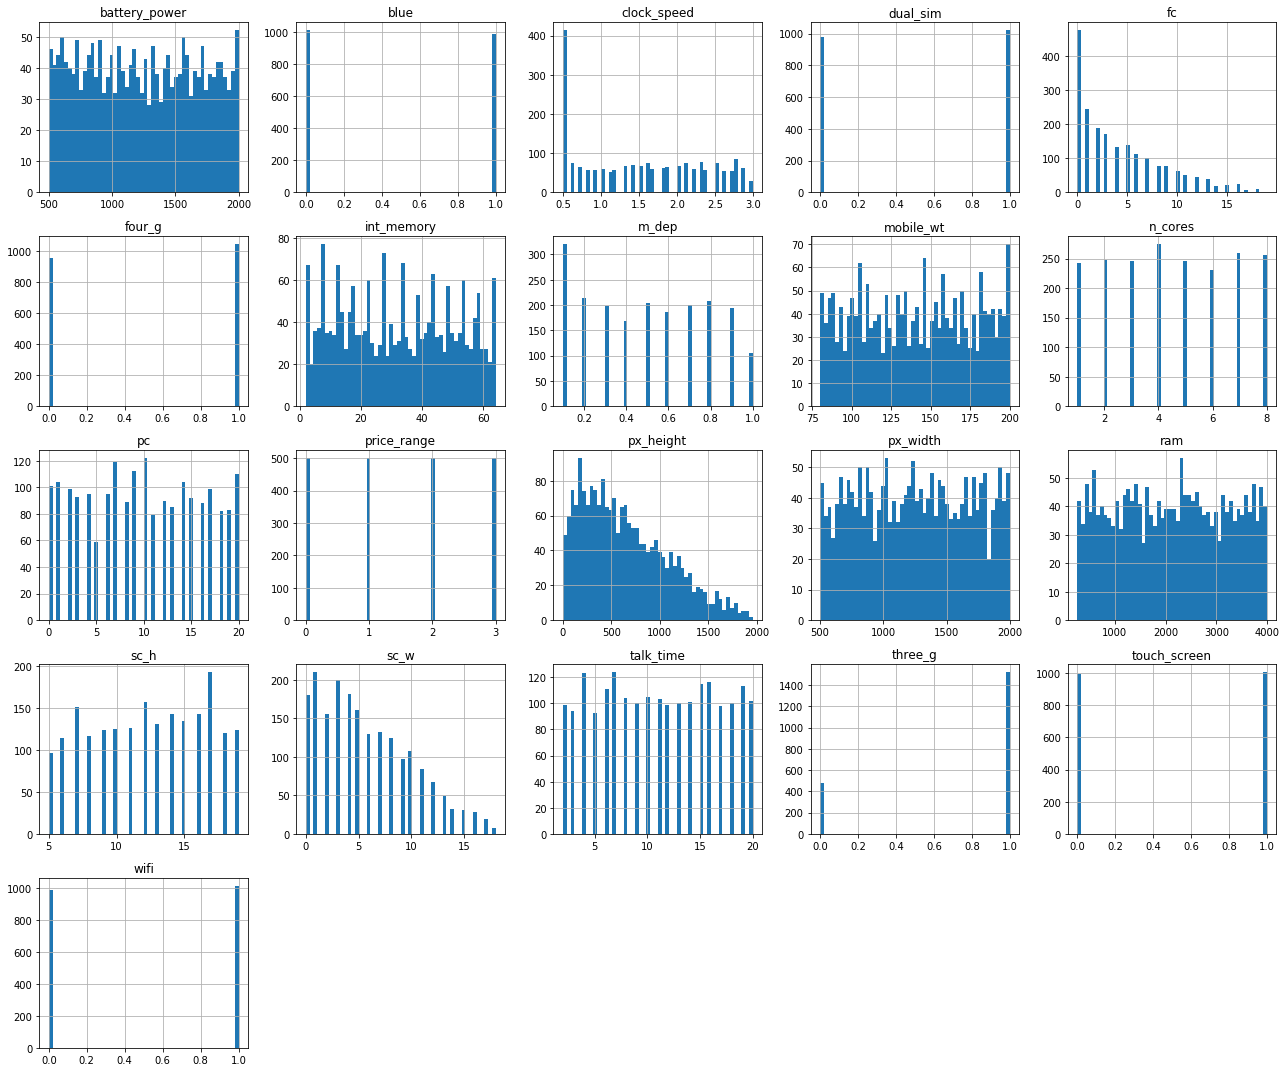

In [68]:

df.hist(bins=50, figsize=(18,15))
plt.tight_layout()
plt.show()

**Analizando la descripción de las columnas y los gráficos anterioes podemos decir que las variables categóricas son**

- blue: Si tiene bluetooth o no 
- dual_sim: Si tiene dual sim o no
- four_g: Si tiene 4G o no
- three_g: Si tiene 3G o no
- wifi: Si tiene wifi o no

n_cores (número de nucleos) y price_range también serían variables categóricas con mas de una opción

In [11]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'n_cores', 'price_range']

**Pasar a factor las columnas categóricas**

Este apartado no aplica en python ya que si observamos el tipo de las variables vemos que todas son numéricas y no es posible pasarlas a factor String ya que luego los modelos no podrían tratar con los datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


**De las variables numéricas hallar datos estadísticos: máximo, mínimo, media, mediana y cuartiles**

In [13]:
#df.drop(columns = categorical, axis=1, inplace=True)
numerical = []
for column in df:
    if column not in categorical:
        numerical.append(column)


In [14]:
print(numerical)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'touch_screen']


In [19]:
df_numerical = df[numerical].copy()

In [20]:
df_numerical.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.503000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500116
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


**De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas.**

In [21]:
df_categorical = df[categorical].copy()

In [22]:
for column in df_categorical:
    print("\n" + column)
    print(df_categorical[column].value_counts())


blue
0    1010
1     990
Name: blue, dtype: int64

dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64

four_g
1    1043
0     957
Name: four_g, dtype: int64

three_g
1    1523
0     477
Name: three_g, dtype: int64

wifi
1    1014
0     986
Name: wifi, dtype: int64

n_cores
4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

price_range
3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


**Crear la matriz de correlaciones con las columnas numéricas**

In [27]:
matriz_corr = df.corr()

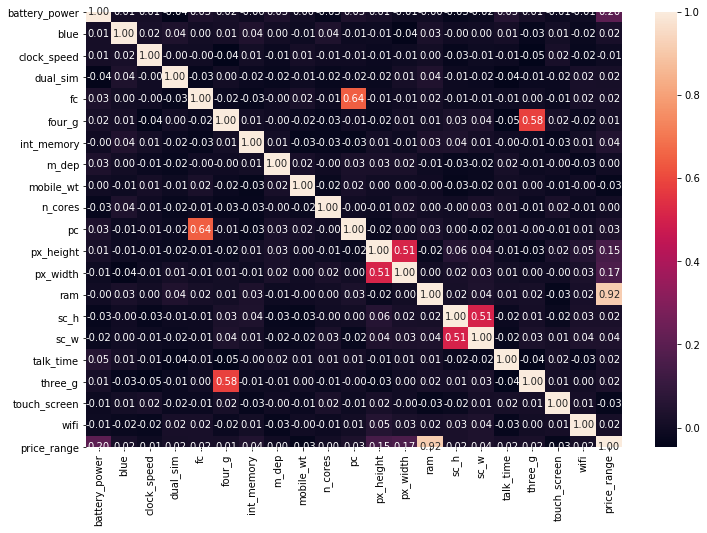

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr,annot=True, fmt='.2f');

**Encontrar las correlaciones más altas, que superen el 0.75**

Debido a que existe una correlación alta entre la variable ram y la variable price_range que queremos precedir, no vamos a eliminarla ya que es una variable que tendrá mucho peso en la predicción

In [29]:
parejas_correlacionadas = matriz_corr.unstack()
parejas_ordenadas = parejas_correlacionadas.sort_values(kind="quicksort")
parejas_ordenadas = parejas_ordenadas[parejas_ordenadas != 1]
parejas_corr_alta = parejas_ordenadas[parejas_ordenadas > 0.75]

tempSerie = pd.Series([],dtype="float64")
templist = []
for index_, value in parejas_corr_alta.items():
    if value not in templist:
        templist.append(value)
        tempSerie = tempSerie.append(parejas_corr_alta.loc[[index_]])

parejas_corr_alta = tempSerie
del(templist)
del(tempSerie)
print(parejas_corr_alta)

(ram, price_range)    0.917046
dtype: float64


**Comprobamos si existen valores nulos**

In [28]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2. Aplicar SVM

**Separar la data en entrenamiento y test**

In [30]:
# Eliminamos la variable a predecir del vector de entrada
X = df.drop(['price_range'], axis=1)  
y = df['price_range']

In [31]:
# Dividimos los datos en 80% para entrenamiento y en 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Crear un primer modelo**

Para escoger el tipo de kernel que se va a utilizar realizamos una representación de las variables ram y battery power ya que ram está muy correlacionada con la variable que queremos predecir. El color varia según la y, así pues podemos observar que un kernel linear serviría ya que es posible separar las clases con lineas rectas

Shape of X:(2000, 20)
Shape of y:(2000,)


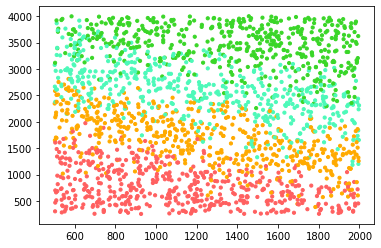

In [32]:
X_plot = np.array(df.iloc[:,[0,13]])
y_plot = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])

plt.scatter(X_plot[:,0],X_plot[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [44]:
svm= svm.SVC(kernel='linear', gamma=1, C = 0.1)
svm.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Aplicar algoritmo de optimización al modelo e imprimir el mejor modelo**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_svm = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': [ 'linear']}  
  
svm = GridSearchCV(svm.SVC(), param_svm) 

svm.fit(X_train, y_train) 

a = svm.best_params_
print(a)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


**Predecir clasificación con el conjunto de datos de test**

In [36]:
y_pred=svm.predict(X_test)

**Crear matriz de confusión y hallar exactitud**

In [37]:
print( metrics.classification_report(y_test, y_pred))
print( metrics.confusion_matrix(y_test, y_pred))
print( metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.94      0.97      0.96       104
           2       0.96      0.92      0.94       104
           3       0.97      0.98      0.97        98

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.96      0.96       400

[[ 93   1   0   0]
 [  1 101   2   0]
 [  0   5  96   3]
 [  0   0   2  96]]
0.965


Como podemos observar en las métricas anteriores, tanto la exactitud como la matriz de confusión nos muestran buenos resultados a pesar de que no se ha realizado ninguna normalización para vectores de soporte.

Además, el tipo de kernel linear es el que nos da unos mejores resultados. Si hubieramos escogido un kernel radial la exactitud se hubiera reducido considerablemente. El resto de parámetros como el coste y la gamma los obtenemos de de la optimización

**Validación cruzada**

Realizamos una validación cruzada para medir la habilidad del modelo cuando se introducen nuevos datos. Realizar una validación cruzada nos permite ver si se ha dado overfitting. Así pues la exactitud del modelo sería la media de las exactitudes, es decir mediante este método podemos obtener una mayor aproximación de la exactitud.

Como podemos observar, las exactitudes entre test y validación son muy parecidas, con lo cual podemos deducir que no tenemos overfitting.

In [48]:
k = 5

kfold = KFold(n_splits=k,shuffle=True)

train_scores = cross_val_score(svm, X_train,y_train, cv = kfold , scoring="accuracy")
test_scores = cross_val_score(svm, X_test, y_test, cv = kfold,  scoring="accuracy")     

In [49]:
print(train_scores)
print(test_scores)

[0.98125  0.96875  0.971875 0.98125  0.984375]
[0.9375 0.95   0.9625 0.9625 0.975 ]


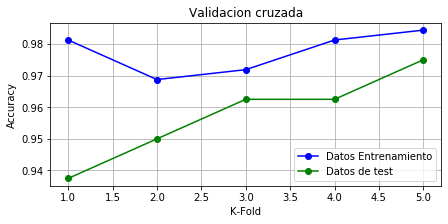

In [50]:
fig,axes = plt.subplots(figsize=(7, 3))
axes.set_title("Validacion cruzada")
axes.set_xlabel("K-Fold")
axes.set_ylabel("Accuracy")

axes.grid()    
axes.plot(range(1,6,1), train_scores, 'o-', color="b",label="Datos Entrenamiento")
axes.plot(range(1,6,1), test_scores, 'o-', color="g",label="Datos de test")
axes.legend(loc="best")

## 2. Aplicar Redes neuronales

Realizamos primero el entrenamiento del modelo sin normalizar los datos para observar la exactitud 

In [74]:
# Eliminamos la variable a predecir del vector de entrada
X = df.drop(['price_range'], axis=1)  
y = df['price_range']

# Separamos entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=2500, activation='logistic')
mlp.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
y_pred=mlp.predict(X_test)

In [77]:
print( metrics.confusion_matrix(y_test, y_pred))
print( metrics.accuracy_score(y_test, y_pred))

[[87 17  0  0]
 [10 74 12  7]
 [ 0 23 22 49]
 [ 0  1 13 85]]
0.67


Como podemos observar sin normalizar no obtenemos buenos resultados ya que la exactitud es solo del 0.67

**Reescalar datos**

In [3]:
# Eliminamos la variable a predecir del vector de entrada
X = df.drop(['price_range'], axis=1)  
y = df['price_range']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

**OneHotEncoderData**

In [4]:
encoder = OneHotEncoder(sparse=False)
y= encoder.fit_transform(df[['price_range']])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


**Separar la data en entrenamiento y test**

In [5]:
# Dividimos los datos en 80% para entrenamiento y en 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Crear modelo de red neuronal**

Para decidir el número de neuronas de la capa oculta representaremos la exactitud en función del numero de neuronas de la capa oculta.

In [6]:
accuracy = []
capas = []
for i in range(1,20):
    mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=1500, activation='logistic')
    mlp.fit(X, y)
    y_pred=mlp.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    capas.append(i)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


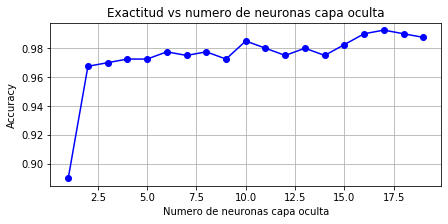

In [11]:
fig,axes = plt.subplots(figsize=(7, 3))
axes.set_title("Exactitud vs numero de neuronas capa oculta")
axes.set_xlabel("Numero de neuronas capa oculta")
axes.set_ylabel("Accuracy")

axes.grid()    
axes.plot(capas, accuracy, 'o-', color="b")

Escogemos el valor de 10 para el numero de neuronas de la capa oculta ya que al augmentar el número de capas practicamente ya no varia la exactitud y se añadiría un coste computacional innecesario.

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=10,max_iter=1500, activation='logistic')
mlp.fit(X, y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

**Dibujar modelo**

Para dibujar el modelo observaremos los atributos n_layers_, n_outputs_ y coefs_ para ver el número de capas y el número de neuronas por capa del modelo.

El atributo coefs_ nos indica los pesos que se han asignado a los nodos. En este parámetro se almacenan los coeficientes de la capa de entrada, que tiene 20 neuronas dado que tenemos 20 variables y los coeficientes de la capa oculta, que hemos impuesto que sea 5.

Se utiliza la función otenida en un repositorio de código (Craffel, 2013)


In [7]:
print("Numero de capas: "+  str(mlp.n_layers_))
print("Numero de salidas (problema multiclase con 4 clases posibles): "+ str(mlp.n_outputs_))
print("Capa de entrada: "+ str(len(mlp.coefs_[0])))
print("Capa oculta: "+ str(len(mlp.coefs_[1])))


Numero de capas: 3
Numero de salidas (problema multiclase con 4 clases posibles): 4
Capa de entrada: 20
Capa oculta: 10


In [14]:

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

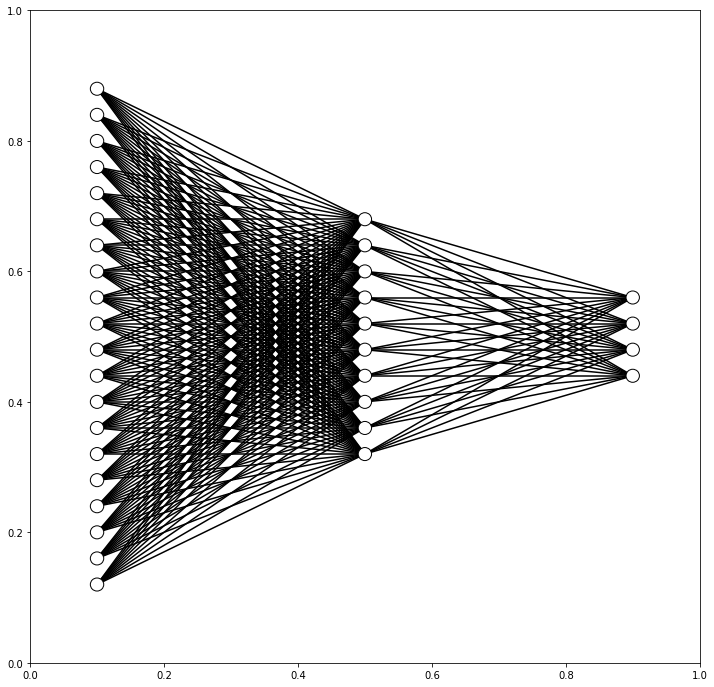

In [15]:
fig = plt.figure(figsize=(12, 12))
draw_neural_net(fig.gca(), .10, .9, .1, .9, [len(mlp.coefs_[0]) ,len(mlp.coefs_[1]), mlp.n_outputs_])

**Predecir clasificación en conjunto de test**

In [8]:
y_pred=mlp.predict(X_test)

**Crear matriz de confusión y hallar exactitud**

Realizamos el inverso de el oneHotEncoder para poder representar la matriz de confusión

In [10]:
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print( metrics.confusion_matrix(y_test_inv, y_pred_inv))
print( metrics.accuracy_score(y_test, y_pred))

[[ 88   0   0   0]
 [  1  96   1   0]
 [  0   0  96   3]
 [  0   0   2 113]]
0.9825


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k = 5

kfold = KFold(n_splits=k,shuffle=True)

train_scores = cross_val_score(mlp, X_train,y_train, cv = kfold ,scoring="accuracy")
test_scores = cross_val_score(mlp, X_test, y_test, cv = kfold, scoring="accuracy")    

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.

In [19]:
print(train_scores)
print(test_scores)

[0.96875  0.965625 0.953125 0.959375 0.978125]
[0.8625 0.825  0.8375 0.8625 0.8625]


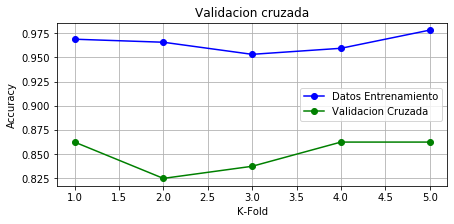

In [20]:
fig,axes = plt.subplots(figsize=(7, 3))
axes.set_title("Validacion cruzada")
axes.set_xlabel("K-Fold")
axes.set_ylabel("Accuracy")

axes.grid()    
axes.plot(range(1,6,1), train_scores, 'o-', color="b",label="Datos Entrenamiento")
axes.plot(range(1,6,1), test_scores, 'o-', color="g",label="Datos de test")
axes.legend(loc="best")

## 4. Comentarios sobre los resultados

Como podemos observar, el mejor modelo es SVM para este caso, ya que aunque a priori las redes neuronales nos ofrecen una mayor exactitud, si observamos los resultados por validación cruzada con SVM obtenemos una mayor exactitud de media que las redes neuronales. 

## 5. Referencias bibliográficas

[1] Craffel. (2013) Draw neural network with matplotlib. https://gist.github.com/craffel/2d727968c3aaebd10359

[2] sklearn MLPClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[3] Shaikh.R (2018). Cross Validation Explained: Evaluating estimator performance. https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85